In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/manthan0227/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv')

In [41]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [42]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [6]:
df.shape

(1000, 3)

c:\python\python3.9.2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python3.9.2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


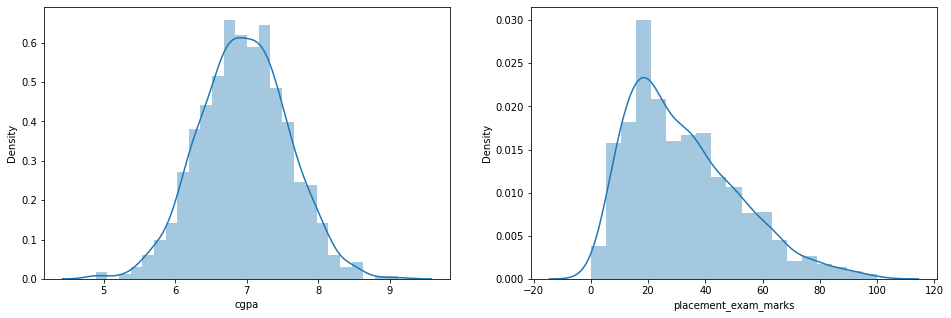

In [9]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [10]:
df['placement_exam_marks'].skew() # Right Skewed Distribution

0.8356419499466834

In [11]:
print('Mean value of cgpa: ', df['cgpa'].mean())
print('Std value of cgpa: ', df['cgpa'].std())
print('Min value of cgpa: ', df['cgpa'].min())
print('Max value of cgpa: ', df['cgpa'].max())


Mean value of cgpa:  6.96124
Std value of cgpa:  0.6158978751323896
Min value of cgpa:  4.89
Max value of cgpa:  9.12


In [12]:
mu = df['cgpa'].mean()
st = df['cgpa'].std()
upper_limit = mu + 3*st
lower_limit = mu - 3*st
print('Upper Limit: ', upper_limit)
print('Lower Limit: ', lower_limit)

Upper Limit:  8.808933625397168
Lower Limit:  5.113546374602832


### Trimming(Remove the outliers from the dataset)

In [15]:
new_df = df[(df['cgpa']<=upper_limit) & (df['cgpa']>=lower_limit)]

In [16]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [17]:
new_df.shape # 5 outliers are removed

(995, 3)

In [18]:
# Calculating Z-Score
df['cgpa_zscore'] = (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [19]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [21]:
df[df['cgpa_zscore']>3] # mu+3*std where mu=0, std=1

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [22]:
df[df['cgpa_zscore']<-3] # mu-3*std

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


##### Above 5 observations are outliers because their cgpa_zscore is not in range of [-3,3]

In [24]:
df[(df['cgpa_zscore']<-3) | (df['cgpa_zscore']>3)] # outliers based on zscore

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [25]:
# Trimming
new_df = df[(df['cgpa_zscore']>-3) & (df['cgpa_zscore']<3)]

In [26]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


### Capping(Outlier value converts into min or max value)

In [27]:
print('Upper Limit', upper_limit)
print('Lower Limit', lower_limit)

Upper Limit 8.808933625397168
Lower Limit 5.113546374602832


In [28]:
df['cgpa'] = np.where(df['cgpa']>upper_limit,
                     upper_limit,
                     np.where(df['cgpa']<lower_limit, 
                             lower_limit,
                             df['cgpa']))

In [31]:
df.shape # here we are not removing outliers but changed the values of the outliers

(1000, 4)

In [32]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

c:\python\python3.9.2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

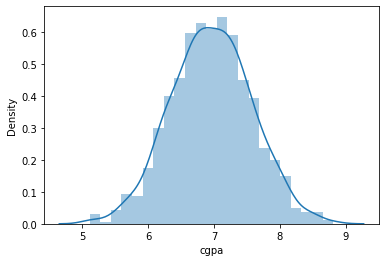

In [35]:
sns.distplot(df['cgpa'])